## Importing Required Libraries

# **Metadata**

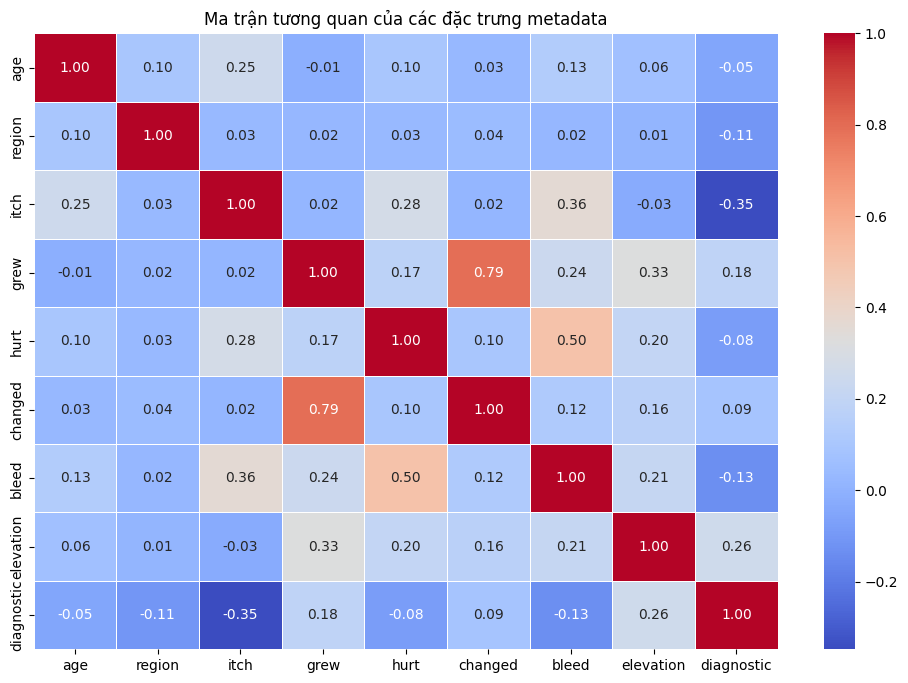

,age,region,itch,grew,hurt,changed,bleed,elevation,biopsed,diagnostic
0,8,1,0,0,0,0,0,0,False,3
1,55,10,1,1,0,1,1,1,True,1
2,77,5,1,0,0,0,0,0,False,0
3,75,8,1,0,0,0,0,0,False,0
4,79,7,1,1,0,0,1,1,True,1


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

dfMetaData = pd.read_csv("/kaggle/input/metadata.csv")

dfDiagnostic = dfMetaData['diagnostic']

dfMetaData = dfMetaData.drop(['diagnostic'], axis=1)
dfMetaData['diagnostic'] = dfDiagnostic

dfMetaData = dfMetaData[["age", "region", "itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed", "diagnostic"]]

label_encoders = {}
for col in dfMetaData.columns:
    if dfMetaData[col].dtype == 'object':  
        le = LabelEncoder()
        dfMetaData[col] = le.fit_transform(dfMetaData[col].astype(str))
        label_encoders[col] = le

dfMetaData.to_csv("Processed_Metadata.csv", index=False)

dfMetaData_numeric = dfMetaData.select_dtypes(include=[np.number])

corr_matrix = dfMetaData_numeric.corr()
df = pd.DataFrame(corr_matrix)
df.to_csv("correlation_matrix.csv", index=False)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan của các đặc trưng metadata")
plt.show()

dfMetaData.head()